In [1]:
import nltk
import pandas as pd

In [2]:
df=pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#longitud del mensaje
df['length'] = df['message'].apply(len)
df.head(10)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

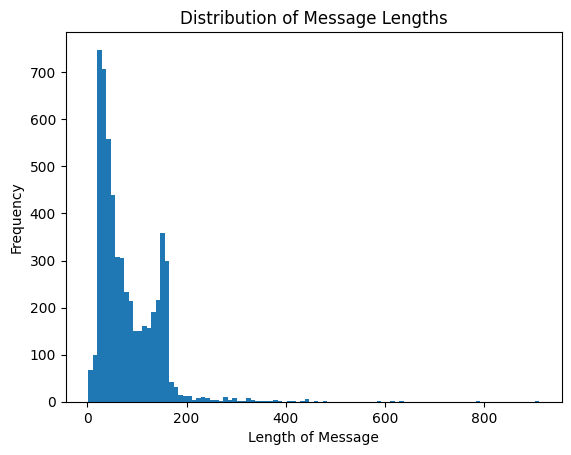

In [6]:
df['length'].plot(kind='hist', bins=100)
plt.title('Distribution of Message Lengths')
plt.xlabel('Length of Message')
plt.ylabel('Frequency')
plt.show()

In [7]:
df.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [8]:
df[df['length'] == 910]['message'].iloc[0]  # Example to find messages with a specific length

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

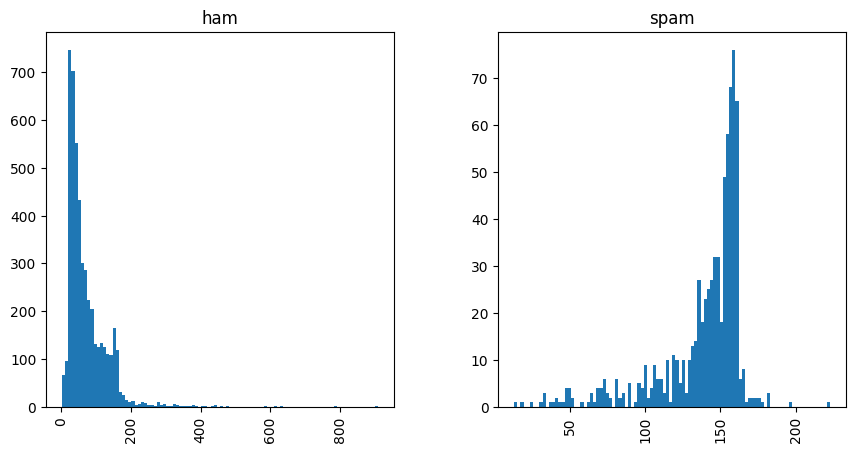

In [9]:
#histogram spam o ham
df.hist(column='length', by='label', bins=100, figsize=(10, 5))


In [10]:
import string
chain = "Example message with punctuation!"

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
without_punctuation = ''.join(char for char in chain if char not in string.punctuation)
without_punctuation

'Example message with punctuation'

In [13]:
from nltk.corpus import stopwords

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stopwords.words('english')  # Example to get English stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [16]:
words = without_punctuation.split()
words

['Example', 'message', 'with', 'punctuation']

In [17]:
chain_cleaned = ''.join(char for char in chain if char not in string.punctuation)
chain_cleaned

'Example message with punctuation'

In [18]:
def process_text(text):
    text = ''.join(char for char in text if char not in string.punctuation)
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    text = text.lower()
    text = ' '.join(word for word in text.split() if len(word) > 2)  # Remove short words
    return text

In [19]:
df['message_cleaned'] = df['message'].apply(process_text)
df.head()

,label,message,length,message_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,29,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win cup final tkts 21st m...
3,ham,U dun say so early hor... U c already then say...,49,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think goes usf lives around though


In [20]:
# Vectorizar: palabras que llenar el diccionario
from sklearn.feature_extraction.text import CountVectorizer


In [21]:
transformer = CountVectorizer(analyzer=process_text).fit(df['message_cleaned'])

In [22]:
print(transformer.vocabulary_)

{'j': 20, 'u': 31, 'r': 28, 'o': 25, 'n': 24, 'g': 17, ' ': 0, 'p': 26, 'i': 19, 't': 30, 'c': 13, 'a': 11, 'z': 36, 'y': 35, 'v': 32, 'l': 22, 'b': 12, 'e': 15, 's': 29, 'w': 33, 'd': 14, 'f': 16, 'm': 23, 'k': 21, '2': 3, '1': 2, '0': 1, '5': 6, 'x': 34, '8': 9, '7': 8, 'q': 27, '4': 5, 'h': 18, '£': 42, '9': 10, '6': 7, '3': 4, '\x92': 38, 'ú': 47, '‘': 50, 'ü': 48, 'è': 44, '\x94': 40, '“': 52, '\x91': 37, '…': 53, '’': 51, '\x93': 39, '»': 43, '—': 49, 'é': 45, 'ì': 46, '鈥': 56, '┾': 54, '〨': 55, '¡': 41}


In [24]:
message4 = df['message_cleaned'][3]

In [25]:
message4

'dun say early hor already say'

In [29]:
message4_transformed = transformer.transform([message4])
message4_transformed.toarray()   

array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0,
        2, 0, 1, 1, 0, 0, 3, 2, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [32]:
# Predicting the class of a new message
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df['message_cleaned'], df['label'], test_size=0.2, random_state=42)

In [34]:
pipeline= Pipeline([
    ('vectorizer', CountVectorizer(analyzer=process_text)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [35]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(analyzer=<function process_text at 0x0000025438C00040>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [36]:
predictions = pipeline.predict(X_test)

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.97      0.89      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

